# NN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from common.NN import NN 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

## データを読む1

In [2]:
train_data = np.load("../1_data/train_data.npy")
train_label = np.load("../1_data/train_label.npy")
print("train_data.shape=", train_data.shape)
print("train_label.shape=", train_label.shape)

train_data.shape= (3000, 1, 28, 28)
train_label.shape= (3000, 15)


In [3]:
# 正規化
train_data = (train_data - train_data.min()) / train_data.max()
train_data = train_data.astype('float32')
# print(train_data)

In [4]:
# 配列形式変更
train_data = train_data.reshape(-1, 28*28)
print("train_data.shape=", train_data.shape)

train_data.shape= (3000, 784)


## trainとtestに分割する

In [5]:
X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, 
                                                                                        test_size=0.3, random_state=1234,
                                                                                        shuffle=True
                                                                                       )

print(X_train.shape, X_test.shape)

(2100, 784) (900, 784)


## 学習

In [6]:
epochs = 500
batch_size = 64
lr = 0.0001
rho = 0.99
epsilon = 1e-6

# 繰り返し回数
xsize = X_train.shape[0]
iter_num = np.ceil(xsize / batch_size).astype(np.int)

nn = NN(
    input_size=28*28,
    hidden_size=300,
    hidden_layer_num=5,
    output_size=15,
    weight_decay_lambda=0.01,
    dropout_ratio=0.5
)

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []
for epoch in range(epochs):
    print("epoch=%s"%epoch)
    
    # シャッフル
    idx = np.arange(xsize)
    np.random.shuffle(idx)

    for it in range(iter_num):
        """
        ランダムなミニバッチを順番に取り出す
        """
        mask = idx[batch_size*it : batch_size*(it+1)]
    
        # ミニバッチの生成
        x_ = X_train[mask]
        y_ = y_train[mask]
        
        # 勾配の計算
        grads = nn.gradient(x_, y_)

        # パラメータの更新
        try:
            h
        except:
            h = {}
            for key, val in nn.params.items():
                h[key] = np.zeros_like(val)

        for key in nn.params.keys():
            h[key] = rho * h[key] + (1 - rho) * grads[key] * grads[key]
            nn.params[key] -= lr * grads[key] / (np.sqrt(h[key] + epsilon) )

    ## 学習経過の記録
    
    # 訓練データにおけるloss
    train_loss.append(nn.loss(X_train,  y_train))
    
    # テストデータにおけるloss
    test_loss.append(nn.loss(X_test, y_test))
    
    # 訓練データにて精度を確認
    train_accuracy.append(nn.accuracy(X_train, y_train))

    # テストデータにて精度を算出
    test_accuracy.append(nn.accuracy(X_test, y_test))

epoch=0
epoch=1
epoch=2
epoch=3
epoch=4
epoch=5
epoch=6
epoch=7
epoch=8
epoch=9
epoch=10
epoch=11
epoch=12
epoch=13
epoch=14
epoch=15
epoch=16
epoch=17
epoch=18
epoch=19
epoch=20
epoch=21
epoch=22
epoch=23
epoch=24
epoch=25
epoch=26
epoch=27
epoch=28
epoch=29
epoch=30
epoch=31
epoch=32
epoch=33
epoch=34
epoch=35
epoch=36
epoch=37
epoch=38
epoch=39
epoch=40
epoch=41
epoch=42
epoch=43
epoch=44
epoch=45
epoch=46
epoch=47
epoch=48
epoch=49
epoch=50
epoch=51
epoch=52
epoch=53
epoch=54
epoch=55
epoch=56
epoch=57
epoch=58
epoch=59
epoch=60
epoch=61
epoch=62
epoch=63
epoch=64
epoch=65
epoch=66
epoch=67
epoch=68
epoch=69
epoch=70
epoch=71
epoch=72
epoch=73
epoch=74
epoch=75
epoch=76
epoch=77
epoch=78
epoch=79
epoch=80
epoch=81
epoch=82
epoch=83
epoch=84
epoch=85
epoch=86
epoch=87
epoch=88
epoch=89
epoch=90
epoch=91
epoch=92
epoch=93
epoch=94
epoch=95
epoch=96
epoch=97
epoch=98
epoch=99
epoch=100
epoch=101
epoch=102
epoch=103
epoch=104
epoch=105
epoch=106
epoch=107
epoch=108
epoch=109
epoch=110


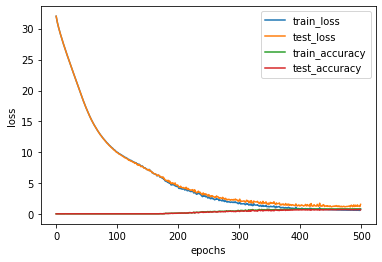

In [10]:
# lossのグラフ化
df_log = pd.DataFrame({"train_loss":train_loss,
             "test_loss":test_loss,
             "train_accuracy":train_accuracy,
             "test_accuracy":test_accuracy})
df_log.plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

## 学習済みモデルの出力

In [11]:
with open("katakana_model.pickle", "wb") as f:
    pickle.dump(nn, f)

In [12]:
print(train_accuracy[-10:-1])

[0.8671428571428571, 0.861904761904762, 0.8680952380952381, 0.8657142857142858, 0.8523809523809524, 0.8638095238095238, 0.8661904761904762, 0.8661904761904762, 0.8695238095238095]
